In [1]:
import darksim.framework as framework
import darksim.dmath as dmath
import darksim.utils as utils
import flowpm
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = (10,10)
uni = framework.ModelUniverse(w=-50, vis_matter=0.06, dark_matter=0.24, dark_energy=0.67, radiation=8.4e-5, lam=0.0, de_type='Cosmological Constant', use_default=False)



INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [3]:
uni.simulate(np.linspace(0.01, 1, 10), 10,  N_mesh=64)

Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
[ModelUniverse_Omb0=0.06_Omd0=0.24_Or0=8.4e-05_DET=Cosmological Constant_Ode0=0.67_DEEOS=-50][64, 2, 0.01-1.0] Time Evolution: 1/9		
[ModelUniverse_Omb0=0.06_Omd0=0.24_Or0=8.4e-05_DET=Cosmological Constant_Ode0=0.67_DEEOS=-50][64, 2, 0.01-1.0] Time Evolution: 2/9		
[ModelUniverse_Omb0=0.06_Omd0=0.24_Or0=8.4e-05_DET=Cosmological Constant_Ode0=0.67_DEEOS=-50][64, 2, 0.01-1.0] Time Evolution: 3/9		
[ModelUniverse_Omb0=0.06_Omd0=0.24_Or0=8.4e-05_DET=Cosmological Constant_Ode0=0.67_DEEOS=-50][64, 2, 0.01-1.0] Time Evolution: 4/9		
[ModelUniverse_Omb0=0.06_Omd0=0.24_Or0=8.4e-05_DET=Cosmological Constant_Ode0=0.67_DEEOS=-50][64, 2, 0.01-1.0] Time Evolution: 5/9		
[ModelUniverse_Omb0=0.06_Omd0=0.24_Or0=8.4e-05_DET=Cosmological Constant_Ode0=0.67_DEEOS=-50][64, 2, 0.01-1.0] Time Evolution: 6/9		
[ModelUniverse_Omb0=0.06_Omd0=0.24_Or0=8.4e-05_DET=Cosmological 

{'a0': 0.01,
 'af': 1.0,
 'a': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ]),
 'steps': 10,
 'N_mesh': 64,
 'L0': 100,
 'batch_size': 2,
 'steps_taken': 9,
 'cosmo': {'w0': -50,
  'wa': 0.0,
  'H0': 100,
  'h': 0.6774,
  'Omega0_b': 0.06,
  'Omega0_c': 0.24,
  'Omega0_m': 0.3,
  'Omega0_k': 0.0,
  'Omega0_de': 0.67,
  'n_s': 0.9667,
  'sigma8': 0.8159},
 'sfn': array([0.01, 0.12, 0.23, 0.34, 0.45, 0.56, 0.67, 0.78, 0.89, 1.  ])}

In [9]:
def rescale_scale_factor(a, lower, upper):
    """ Rescales scale factor for use in uni.simulate"""
    

<IPython.core.display.Javascript object>


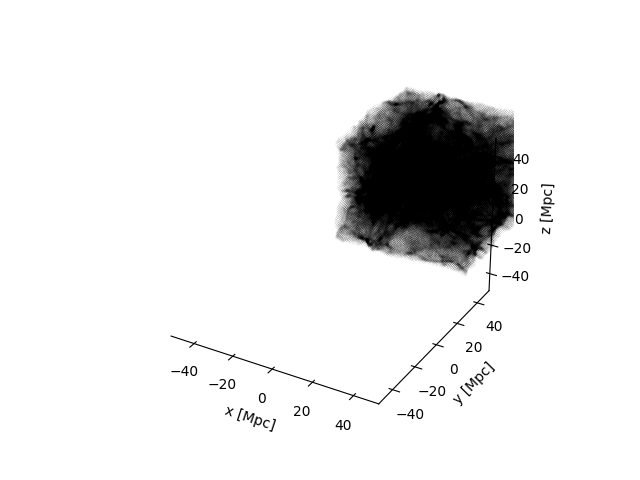

In [4]:
str_uni = str(uni)
str_uni
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as mpl_anim
from matplotlib import rc

%matplotlib notebook

def animate3d(uni, fps=10, update_axis=True, title='', **kwargs):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    scatter, = ax.plot([], [], [], ".", markersize=.075, color='black')
    
    # Plot parameters
    # Axis limits
    lim = uni.info['L0'] / 2
    ax.set_xlim(-lim,lim)
    ax.set_ylim(-lim,lim)
    ax.set_zlim(-lim,lim)
    
    # Fonts
    rc('font',size=12)
    rc('font',family='serif')
    rc('axes',labelsize=8)
    
    # Resolution
    rc('figure.figsize = (10, 10)')
    # Titles
#     ax.set_title('Model Universe, $\Omega_{M,0}=${}, $\Omega_{r,0}=${}, $\Omega_{DE,0}=${} ({})'.format(uni._matter, uni._r, uni._de, uni.de_type))
    ax.set_xlabel('x [Mpc]')
    ax.set_ylabel('y [Mpc]')
    ax.set_zlabel('z [Mpc]')
    
    # Remove background
    ax.grid(False)
    ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
    
    # Ticks
    ax.xaxis._axinfo['tick']['inward_factor'] = .4
    ax.xaxis._axinfo['tick']['outward_factor'] = 0.2
    ax.yaxis._axinfo['tick']['inward_factor'] = .4
    ax.yaxis._axinfo['tick']['outward_factor'] = 0.2
    ax.zaxis._axinfo['tick']['inward_factor'] = .4
    ax.zaxis._axinfo['tick']['outward_factor'] = 0.2
    ax.zaxis._axinfo['tick']['outward_factor'] = 0.2
    def _update3d(i):
        result = uni.read_time_step(i)
        scatter.set_data(result[0,0,:,0], result[0,0,:,1])
        scatter.set_3d_properties(result[0,0,:,2])
        
    ani = mpl_anim.FuncAnimation(fig, _update3d, uni.info['steps'], interval=1000/fps, 
                                 blit=False, cache_frame_data=False, **kwargs)
    return ani


anim_obj = animate3d(uni,)

plt.show()

In [4]:
f = r"/home/rettwolf/projects/PHYS3266/test_anim.mp4" 
# writer = mpl_anim.PillowWriter(fps=30) 
writer = mpl_anim.FFMpegWriter(fps=8, )
anim_obj.save(f, writer=writer, dpi=800)

<IPython.core.display.Javascript object>


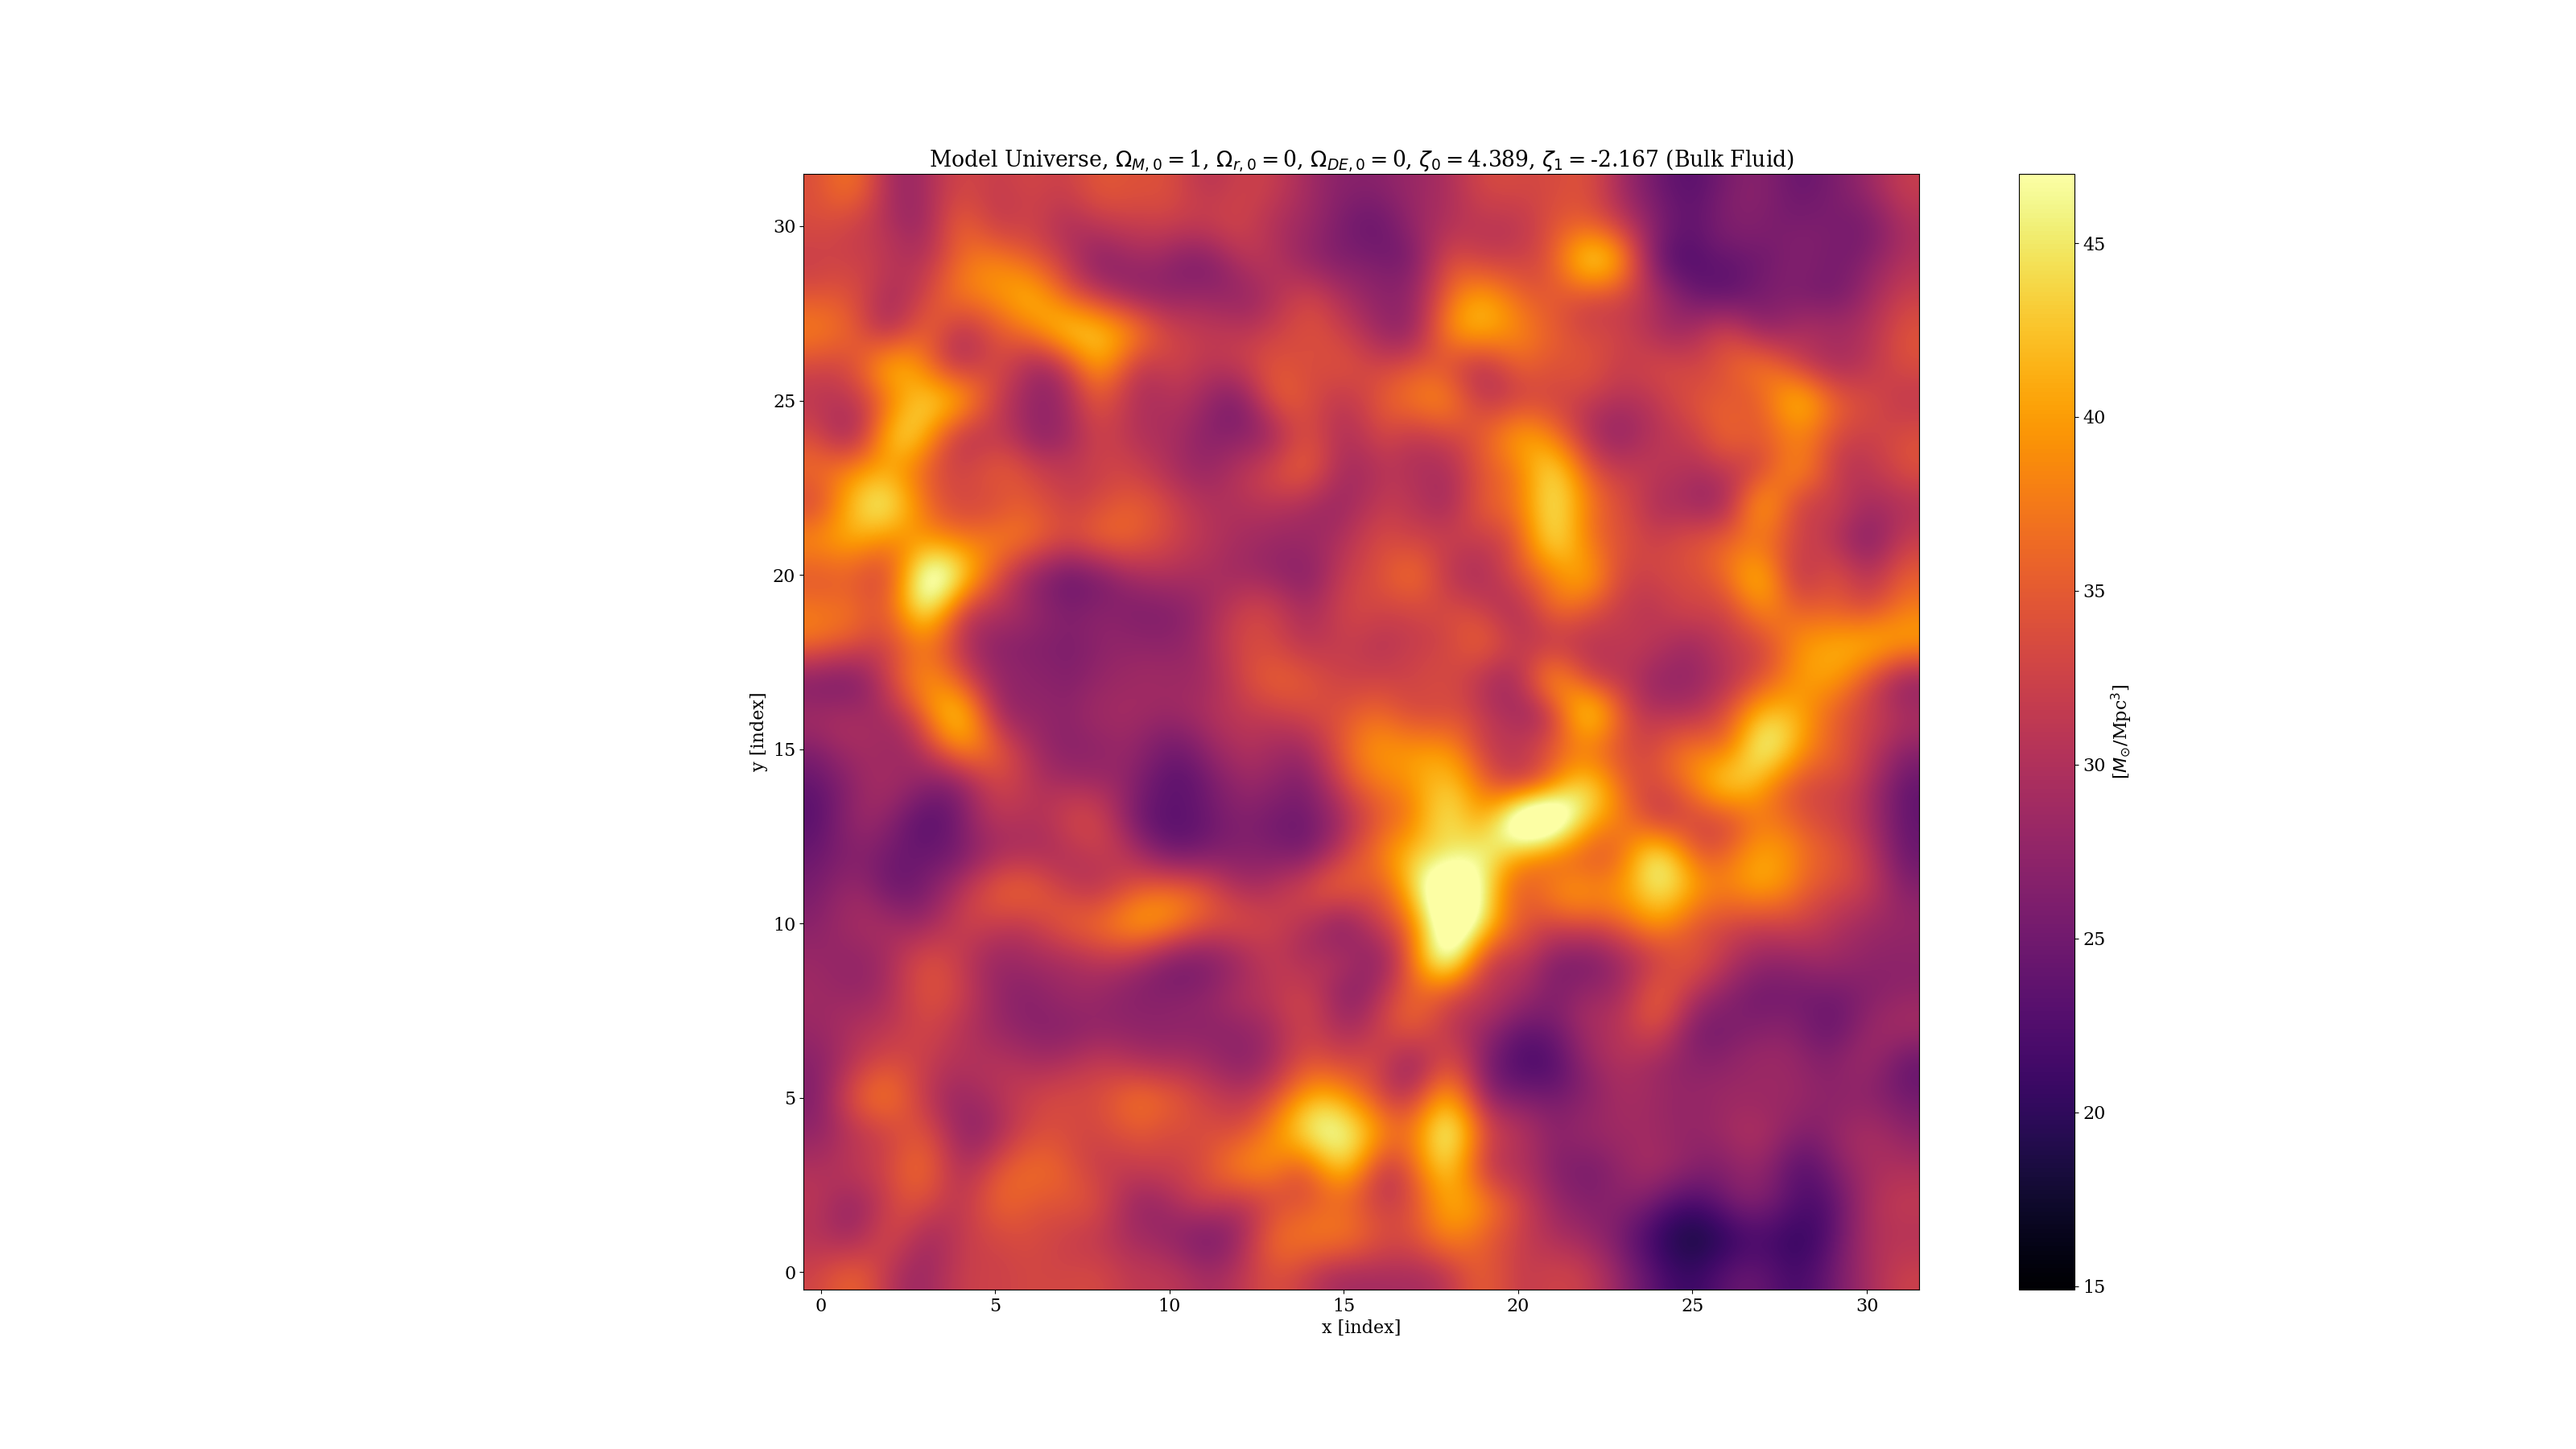

saving


MovieWriter stderr:
/home/dev/final_imshow_heatmap_256_ModelUniverse_Omb0=0.06_Omd0=0.24_Or0=8.4e-05_DET=CC_Ode0=0.67_DEEOS=-1.1.mp4: No such file or directory



CalledProcessError: Command '['ffmpeg', '-f', 'rawvideo', '-vcodec', 'rawvideo', '-s', '6400x3600', '-pix_fmt', 'rgba', '-r', '10', '-loglevel', 'error', '-i', 'pipe:', '-vcodec', 'h264', '-pix_fmt', 'yuv420p', '-y', '/home/dev/final_imshow_heatmap_256_ModelUniverse_Omb0=0.06_Omd0=0.24_Or0=8.4e-05_DET=CC_Ode0=0.67_DEEOS=-1.1.mp4']' returned non-zero exit status 1.

In [15]:
import darksim.framework as framework
import darksim.dmath as dmath
import darksim.utils as utils
import flowpm
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as mpl_anim
from matplotlib import rc
import time
import tensorflow as tf
plt.rcParams["figure.figsize"] = (32, 18)
st = time.time()
uni = framework.ModelUniverse(w=-1.1, vis_matter=0.06, dark_matter=0.24, de_type='CC', dark_energy=0.67, radiation=8.4e-5, lam=0.0, use_default=False)
# sim = uni.simulate(0.01, 1, 20, N_mesh=32)
uni.info = {
    'L0': 100,
    'steps':10,
    'N_mesh': 32
}
# %matplotlib notebook
uni.DIR = 
def animateDensity(uni, fps=10, update_axis=True, title='', save=True, filename=r"/home/dev/animations/{}.mp4", dpi=200, **kwargs):
    # Plot parameters
    # Axis limits
    lim = uni.info['L0'] / 2
    
    fig = plt.gcf()
    ax = plt.axes()

    # Fonts
    rc('font',size=16)
    rc('font',family='serif')
    rc('axes',labelsize=16)
    
    # Resolution
    # rc('figure.figsize = (15, 15)')
    # Titles
    if title == '':
        title = f'Model Universe Density Mesh, $\Omega_{{M,0}}=$1, $\Omega_{{r,0}}=$0, $\Omega_{{DE,0}}=$0, $\zeta_0=$4.389, $\zeta_1=$-2.167 (Bulk Fluid)'
        
    ax.set_title(title)
    ax.set_xlabel('x [index]', fontsize=16)
    ax.set_ylabel('y [index]', fontsize=16)

    _res = uni.read_time_step(uni.info['steps'] - 1)
    
    paint = flowpm.cic_paint(
        tf.zeros_like(np.ndarray((2,uni.info['N_mesh'],uni.info['N_mesh'],uni.info['N_mesh']), dtype=np.float32)), _res[0,:,:,:]
    )[0].numpy().sum(axis=0)
    
    _min, _max = np.min(paint), np.max(paint)

    # Find 90% of points, so as much detail as possible can be seen
    vmin = _min # Don't change vmin, leads to good detail
    vmax = _max 
    length = paint.shape[0]
    while True:
        size = np.where(paint > vmax)[0].shape[0]


        if size >= length * .90: # Take only [:90%] of elements
            break

        vmax -= 1

    def _updateDensity(i):
        im.set_array(
            flowpm.cic_paint(
                tf.zeros_like(np.ndarray((2,uni.info['N_mesh'],uni.info['N_mesh'],uni.info['N_mesh']), dtype=np.float32)), uni.read_time_step(i)[0,:,:,:]
            )[0].numpy().sum(axis=0)
        )
        return im,
    
    # Initial plot
    im = plt.imshow(
        flowpm.cic_paint(
            tf.zeros_like(np.ndarray((2,uni.info['N_mesh'],uni.info['N_mesh'],uni.info['N_mesh']), dtype=np.float32)), _res[0,:,:,:])[0].numpy().sum(axis=0),
        interpolation='lanczos', cmap='inferno', vmin=vmin, vmax=vmax, origin='lower'
    )
    plt.colorbar(label='[$10^{18} M_{\odot}/$Mpc$^3$]')
    
    anim = mpl_anim.FuncAnimation(fig, _updateDensity, uni.info['steps'], interval=1000/fps, **kwargs)

    if save:
        print('saving')
        # writer = mpl_anim.PillowWriter(fps=30) # gif
        writer = mpl_anim.FFMpegWriter(fps=10) # mp4
        anim.save(filename.format('final_imshow_heatmap_256_' + str(uni)), writer=writer, dpi=dpi)
    return anim
anim_obj = animateDensity(uni,)

In [ ]:
_res = uni.read_time_step(149)

In [8]:
_min, _max = np.min(_res[0,:,:,0]), np.max(_res[0,:,:,0])

coeff = uni.info['L0'] / (_max - _min)
offset = coeff * (_max - _min) / 2

In [13]:
_max

296.70935

In [ ]:
plt.imshow(
    flowpm.cic_paint(
        tf.zeros_like(np.ndarray((2,uni.info['N_mesh'],uni.info['N_mesh'],uni.info['N_mesh']), dtype=np.float32)), uni.read_time_step(5)[0,:,:,:])[0].numpy().sum(axis=0),
    interpolation='lanczos', cmap='inferno'
)
cbar = plt.colorbar()
cbar.set_label('testing label', rotation=270)

In [16]:
paint = flowpm.cic_paint(tf.zeros_like(np.ndarray((2,256,256,256), dtype=np.float32)), _res[0,:,:,:])[0].numpy().sum(axis=0)

In [17]:
paint

array([[ 72.65211 ,  68.32925 ,  74.79376 , ..., 120.62138 , 104.49008 ,
         83.70136 ],
       [ 75.016235,  66.727936,  58.610794, ...,  83.10414 ,  90.614555,
         73.02319 ],
       [ 71.64865 ,  69.79299 ,  73.719185, ...,  58.766434,  66.867874,
         71.713326],
       ...,
       [176.65076 , 148.76309 , 134.56287 , ..., 142.94649 , 186.92545 ,
        236.27176 ],
       [117.75573 , 121.51394 ,  99.91492 , ..., 108.00928 , 118.80783 ,
        129.43909 ],
       [ 85.30978 ,  90.48531 ,  92.24985 , ..., 121.43983 ,  94.69587 ,
        108.98709 ]], dtype=float32)

In [61]:
_max = np.max(paint)
_min = np.min(paint)
_min

26.412975

In [56]:
# Find 90% of points, so as much detail as possible can be seen
vmax = _max
length = paint.shape[0]
while True:
    size = np.where(paint > vmax)[0].shape[0]
    
    
    if size >= length * .90:
        break
    
    vmax -= 1
    
vmin = _min
length = paint.shape[0]
while True:
    size = np.where(paint < vmin)[0].shape[0]
    
    
    if size >= length * 1.05:
        break
    
    vmin += 1

In [57]:
vmax

3699.91796875

In [51]:
vmin

38.4129753112793

Text(0.5, 1.0, 'Model Universe, $\\Omega_{M,0}=$0.3, $\\Omega_{r,0}=$8.4e-05, $\\Omega_{DE,0}=$0.67 (Cosmological Constant)')

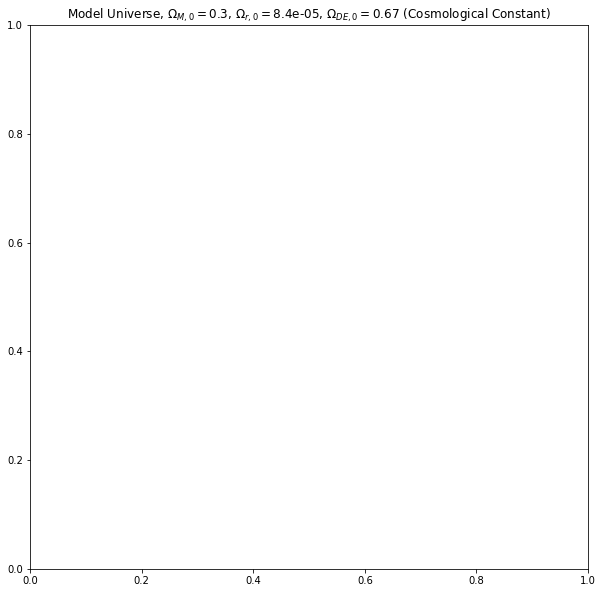

In [8]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.set_title('Model Universe, $\Omega_{M,0}=$%s, $\Omega_{r,0}=$%s, $\Omega_{DE,0}=$%s (%s)'%(uni._matter, uni._r, uni._de, uni.de_type))

In [ ]:
# Bulk Viscosity animations
import darksim.framework as framework
import darksim.dmath as dmath
import darksim.utils as utils
import flowpm
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as mpl_anim
from matplotlib import rc
import time
import tensorflow as tf
plt.rcParams["figure.figsize"] = (10,10)
st = time.time()
uni = framework.ModelUniverse(w=-1.1, vis_matter=0.06, dark_matter=0.24, dark_energy=0.67, radiation=8.4e-5, lam=0.0, use_default=False)
# sim = uni.simulate(0.01, 1, 20, N_mesh=32)
uni.info = {
    'L0': 100,
    'steps':150,
    'N_mesh': 256
}
%matplotlib notebook
